In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from matplotlib.animation import FuncAnimation


In [2]:
url = 'https://media.geeksforgeeks.org/wp-content/uploads/20240320114716/data_for_lr.csv'
data = pd.read_csv(url)
data

# Drop the missing values
data = data.dropna()

# training dataset and labels
train_input = np.array(data.x[0:500]).reshape(500, 1)
train_output = np.array(data.y[0:500]).reshape(500, 1)

# valid dataset and labels
test_input = np.array(data.x[500:700]).reshape(199, 1)
test_output = np.array(data.y[500:700]).reshape(199, 1)


In [12]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegression:
    def __init__(self):
        self.parameters = {}
        
    def forward_propagation(self, train_input):
        m = self.parameters['m']
        c = self.parameters['c']
        predictions = np.multiply(m, train_input) + c
        return predictions
    
    def cost_function(self, predictions, train_output):
        cost = np.mean((train_output - predictions))
        return cost
    
    def backward_propagation(self, train_input, train_output, predictions):
        derivatives = {}
        df = (predictions - train_output)
        # dm = 2/n * mean of (predictions-actual) * input
        dm = 2 * np.mean(np.multiply(train_input, df))
        # dc = 2/n * mean of (predictions-actual)
        dc = 2 * np.mean(df)
        derivatives['dm'] = dm
        derivatives['dc'] = dc
        return derivatives
    
    def update_parameters(self, derivatives, learning_rate):
        self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm']
        self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc']
    
    def train(self, train_input, train_output, learning_rate, iters):
        # Initialize random parameters
        self.parameters['m'] = np.random.uniform(0, 1) * -1
        self.parameters['c'] = np.random.uniform(0, 1) * -1
        
        # Initialize loss
        self.loss = []
        
        # Training loop
        for i in range(iters):
            # Forward propagation
            predictions = self.forward_propagation(train_input)
            
            # Cost function
            cost = self.cost_function(predictions, train_output)
            
            # Back propagation
            derivatives = self.backward_propagation(train_input, train_output, predictions)
            
            # Update parameters
            self.update_parameters(derivatives, learning_rate)
            
            # Append loss and printZ
            self.loss.append(cost)
            if (i + 1) % 100 == 0 or i == 0:  # Print every 100 iterations
                print("Iteration = {}, Loss = {:.6f}".format(i + 1, cost))
        
        # Plot final results
        plt.figure(figsize=(10, 6))
        
        # Plot data points
        plt.scatter(train_input, train_output, color='blue', label='Training Data')
        
        # Plot final regression line
        x_vals = np.linspace(min(train_input), max(train_input), 100)
        y_vals = self.parameters['m'] * x_vals + self.parameters['c']
        plt.plot(x_vals, y_vals, color='red', label='Regression Line')
        
        plt.xlabel('Input')
        plt.ylabel('Output')
        plt.title('Linear Regression Results')
        plt.legend()
        plt.grid(True)
        plt.show()
        
        # Plot loss over iterations
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, iters + 1), self.loss)
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.title('Loss vs. Iterations')
        plt.grid(True)
        plt.show()
        
        return self.parameters, self.loss

Iteration = 1, Loss = -3.249283
Iteration = 100, Loss = 0.821325
Iteration = 200, Loss = 0.354451
Iteration = 300, Loss = 0.095813
Iteration = 400, Loss = 0.022589
Iteration = 500, Loss = 0.005020
Iteration = 600, Loss = 0.001083
Iteration = 700, Loss = 0.000230
Iteration = 800, Loss = 0.000048
Iteration = 900, Loss = 0.000010
Iteration = 1000, Loss = 0.000002


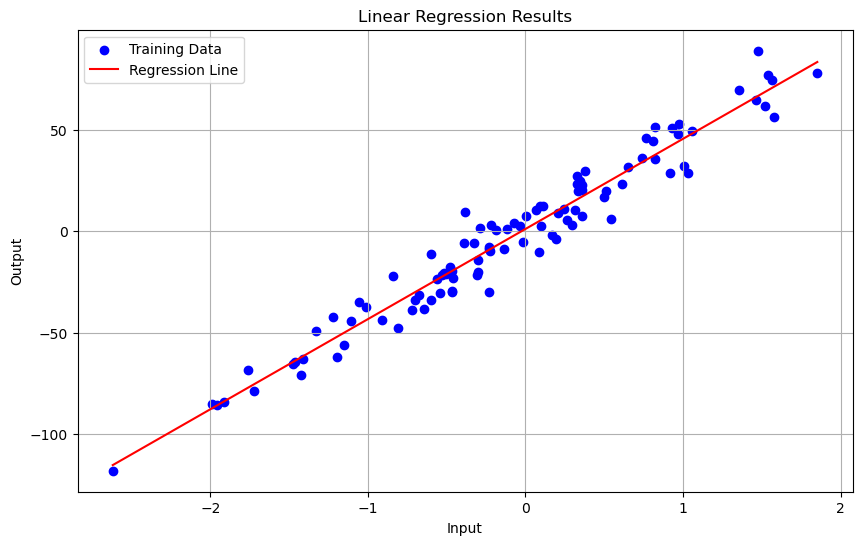

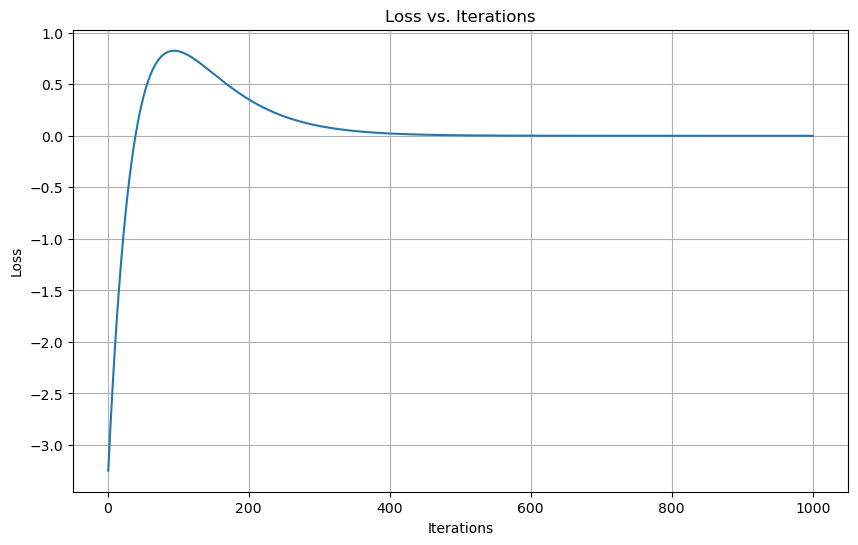

Trained model: y = 44.4372x + 1.1651
Prediction for x=2.5: 112.2580


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
# Assuming you've already defined the LinearRegression class above

# 1. Generate or load your data
# Option 1: Create synthetic data
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
X = X.flatten()  # Flatten to 1D array

# Option 2: Or use your own data
# X = your_input_data  # Should be a 1D numpy array
# y = your_output_data  # Should be a 1D numpy array

# 2. Initialize the model
model = LinearRegression()

# 3. Train the model
# Parameters:
# - train_input: your input features (X)
# - train_output: your target values (y)
# - learning_rate: controls step size (try 0.01 to start)
# - iters: number of training iterations (try 1000 to start)
parameters, loss_history = model.train(
    train_input=X,
    train_output=y,
    learning_rate=0.01,
    iters=1000
)

# 4. Access the trained model parameters
m = parameters['m']  # Slope
c = parameters['c']  # Intercept
print(f"Trained model: y = {m:.4f}x + {c:.4f}")

# 5. Make predictions with trained model
def predict(x):
    return m * x + c

# Example prediction
new_x = 2.5
prediction = predict(new_x)
print(f"Prediction for x={new_x}: {prediction:.4f}")